# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import pandas as pd 
from copy import deepcopy
from matplotlib import pyplot as plt
%matplotlib inline

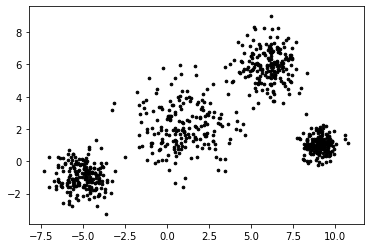

In [2]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

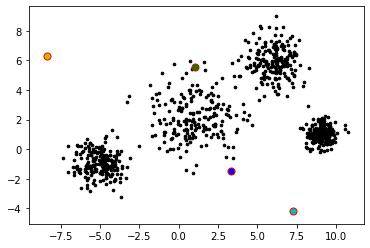

In [3]:
np.random.seed(6)
centres = np.random.randn(4,2)*data.std() + data.mean()
plt.scatter(data[:,0], data[:,1], s=7, c='k')

bank = 'g', 'b', 'y', 'c'
for i in range(0, 4):
        plt.scatter(centres[i][0], centres[i][1], color = bank[i], s = 50).set_edgecolor('r')
plt.show()

## 2. Visualise the clustering results in each iteration

The KMeans clustering algorithim is as follows:
![Image of Kmeans](https://i.gyazo.com/3431d314f7940470a1e945057a804f24.png)

In [4]:
# Euclidean Distance Caculator (Sourced from: https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy, with some minor adjustments (axis introduction for cluster centres))
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

Initially create some variables in order to assist us in the stages of Kmeans clustering, the purpose of the variables are as follows
- **CentroidNew**: Provide a place to store new values of centroids once computed
- **clusters**: Provide a label for each data point, to which cluster it belongs to. Currently, every data point does not belong to a cluster, it is just a copy of the data matrix, with 0 values to be filled in later to the correct cluster.
- **Var**: Will provide the Euclidean distance between new and old centroids, which serves as the stopping criteria.

In [5]:
CentroidNew = np.zeros(centres.shape)

clusters = np.zeros(len(data))

Var = dist(centres, CentroidNew, None)

## 2. Cluster membership
This function will be useful in the following steps to compute the final result, the function is the second stage of K-Means clustering, where we decide the cluster memberships of the data samples by assigning them to the nearest-cluster centroids.

The function works by recieving an input data set, it then computes the distance between each data point and the initially randomly selected cluster centroids. Since there are 4 clusters, each data point distance will be contained within a array of length 4. Finally, each data point is chosen to be in a cluster, by selecting the the minimum array value index. This process is repeated until each data point is in a cluster. An example is shown below.

In [6]:
def ClosetCluster(dataset):
    for i in range(len(dataset)):
        clusters[i] = np.argmin(dist(dataset[i], centres))

In [7]:
print(dist(data[1], centres))
print(np.argmin(dist(data[1], centres)))

[ 5.32200547  3.38203573 13.82586139  6.33558191]
1


## 3. Updating cluster centres 
The next function is the third step of the algorithm, in which we re-estimate the 4 cluster centers by assuming the memberships found above are correct. The new cluster centroids are then found by taking the average of all the points assigned to the specific cluster.

The function works by recieving an input data set, then looping through each cluster, shown by the first loop. The clusterpoints variable simply creates an array and just assigns each data point to the cluster they belong to. This function then calculates the centres new position based upon this data.

In [8]:
def ReEstimate (dataset):
    for i in range(0, 4):
        clusterpoints = [dataset[x] 
                  for x in range(len(dataset)) 
                  if clusters[x] == i]
        centres[i] = np.mean(clusterpoints, axis=0)

## 4. Loop until there is no change
Now we must combine these functions to do step 4, in order to get the final resulting clusters, this is done via the following cells in which the entire algorithm is run. It takes the previous functions and uses them in order to compute the final result. The cell will loop until the error is = 0 (No distance between old and new centroids). A secondary function has been created to show the process of each iteration.


In [9]:
def plot():
    plt.subplots()
    for i in range(0, 4):
        clusterpoints = np.array([data[x] 
                                  for x in range(len(data)) 
                                  if clusters[x] == i])
        plt.scatter(clusterpoints[:, 0], clusterpoints[:, 1], s=7, color=bank[i])
        plt.scatter(centres[i][0], centres[i][1], color = bank[i], s = 100).set_edgecolor('r')

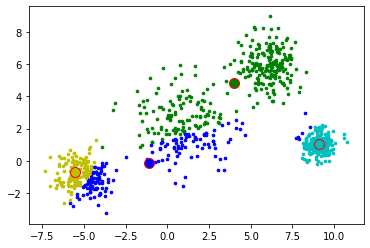

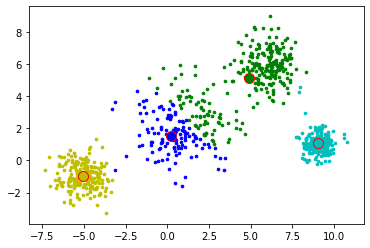

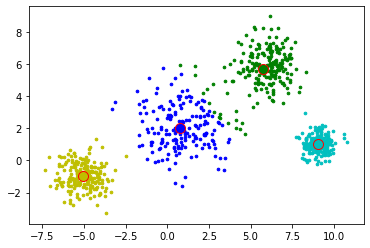

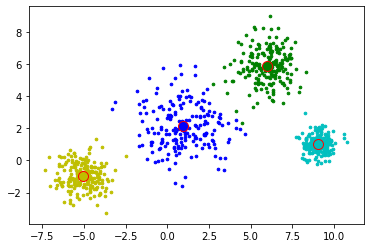

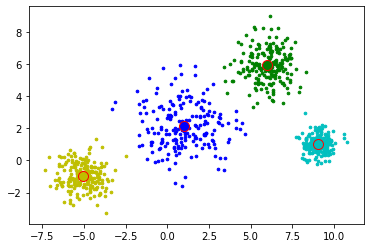

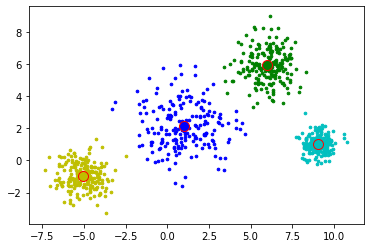

In [10]:
while Var !=0:
    #Get closet clusters
    ClosetCluster(data)
    #Store new centroid values
    CentroidNew = deepcopy(centres)
    #Update cluster centres
    ReEstimate(data)
    #Check for whether the centre has moved 
    Var = dist(centres, CentroidNew, None)
    plot()